In [1]:
import pandas as pd
import talib as ta
import plotly.express as px
import matplotlib.pyplot as plt
import pynance as pn


In [2]:
# Load the datasets
apple = '../data/yfinance/AAPL_historical_data.csv'
amazon = '../data/yfinance/AMZN_historical_data.csv'
google = '../data/yfinance/GOOG_historical_data.csv'
meta = '../data/yfinance/META_historical_data.csv'
microsoft = '../data/yfinance/MSFT_historical_data.csv'
nvda = '../data/yfinance/NVDA_historical_data.csv'
tsla = '../data/yfinance/TSLA_historical_data.csv'

In [3]:
class check_data_before_analysis:
    def __init__(self):
        pass
    def load_stock_data(self,filepath):
        self.data = pd.read_csv(filepath)
        return self.data
    def null_values_count(self,data):
        return data.isnull().sum()
    

In [4]:
see_data = check_data_before_analysis()
data = see_data.load_stock_data(apple)
data

Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.098943   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093781   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086898   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089049   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091630   
...           ...         ...         ...         ...         ...         ...   
10993  2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
10994  2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
10995  2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
10996  2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
10997  2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

          Volume  Dividends  Stock Splits  
0      469033600        0.0           0.0  
1      175884800        0.0           0.0  
2      105728000        0.0           0.0  
3       86441600        0.0           0.0  
4       73449600        0.0           0.0  
...          ...        ...           ...  
10993   61777600        0.0           0.0  
10994   51391200        0.0           0.0  
10995   41601300        0.0           0.0  
10996   36311800        0.0           0.0  
10997   41643800        0.0           0.0  

[10998 rows x 9 columns]

In [5]:
nan_rows = data[data.isna().any(axis=1)]
nan_rows

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Dividends, Stock Splits]
Index: []

In [6]:
data_amazon = see_data.load_stock_data(amazon)
data_amazon.head()

Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [7]:
nan_rows = data_amazon.isna()
nan_rows

Date   Open   High    Low  Close  Adj Close  Volume  Dividends  \
0     False  False  False  False  False      False   False      False   
1     False  False  False  False  False      False   False      False   
2     False  False  False  False  False      False   False      False   
3     False  False  False  False  False      False   False      False   
4     False  False  False  False  False      False   False      False   
...     ...    ...    ...    ...    ...        ...     ...        ...   
6841  False  False  False  False  False      False   False      False   
6842  False  False  False  False  False      False   False      False   
6843  False  False  False  False  False      False   False      False   
6844  False  False  False  False  False      False   False      False   
6845  False  False  False  False  False      False   False      False   

      Stock Splits  
0            False  
1            False  
2            False  
3            False  
4            False  
...            ...  
6841         False  
6842         False  
6843         False  
6844         False  
6845         False  

[6846 rows x 9 columns]

In [8]:
nan_counts = data_amazon.isna().sum()
print(nan_counts)

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [9]:
data_amazon.shape

(6846, 9)

In [10]:
see_data.null_values_count(data)

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [11]:
google_data= see_data.load_stock_data(google)
google_data.head()


Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [12]:
isnul = google_data.isna()
isnul

Date   Open   High    Low  Close  Adj Close  Volume  Dividends  \
0     False  False  False  False  False      False   False      False   
1     False  False  False  False  False      False   False      False   
2     False  False  False  False  False      False   False      False   
3     False  False  False  False  False      False   False      False   
4     False  False  False  False  False      False   False      False   
...     ...    ...    ...    ...    ...        ...     ...        ...   
5015  False  False  False  False  False      False   False      False   
5016  False  False  False  False  False      False   False      False   
5017  False  False  False  False  False      False   False      False   
5018  False  False  False  False  False      False   False      False   
5019  False  False  False  False  False      False   False      False   

      Stock Splits  
0            False  
1            False  
2            False  
3            False  
4            False  
...            ...  
5015         False  
5016         False  
5017         False  
5018         False  
5019         False  

[5020 rows x 9 columns]

In [13]:
see_data.null_values_count(google_data)

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [14]:
meat_data =see_data.load_stock_data(meta)
meat_data.head()

Date       Open       High        Low      Close  Adj Close  \
0  2012-12-12  28.000000  28.139999  27.370001  27.580000  27.523441   
1  2012-12-13  27.590000  28.750000  27.430000  28.240000  28.182087   
2  2012-12-14  28.180000  28.330000  26.760000  26.809999  26.755020   
3  2012-12-17  26.770000  27.000000  26.320000  26.750000  26.695143   
4  2012-12-18  26.959999  27.910000  26.900000  27.709999  27.653173   

     Volume  Dividends  Stock Splits  
0  46704200        0.0           0.0  
1  81051600        0.0           0.0  
2  91631600        0.0           0.0  
3  57742500        0.0           0.0  
4  60512900        0.0           0.0

In [15]:
see_data.null_values_count(meat_data)

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [16]:
see_data.load_stock_data(microsoft)

Date        Open        High         Low       Close   Adj Close  \
0     1986-03-13    0.088542    0.101563    0.088542    0.097222    0.059946   
1     1986-03-14    0.097222    0.102431    0.097222    0.100694    0.062087   
2     1986-03-17    0.100694    0.103299    0.100694    0.102431    0.063158   
3     1986-03-18    0.102431    0.103299    0.098958    0.099826    0.061552   
4     1986-03-19    0.099826    0.100694    0.097222    0.098090    0.060482   
...          ...         ...         ...         ...         ...         ...   
9667  2024-07-24  440.450012  441.480011  427.589996  428.899994  428.128326   
9668  2024-07-25  428.799988  429.799988  417.510010  418.399994  417.647217   
9669  2024-07-26  418.200012  428.920013  417.269989  425.269989  424.504852   
9670  2024-07-29  431.579987  432.149994  424.700012  426.730011  425.962250   
9671  2024-07-30  427.720001  429.049988  417.359985  422.920013  422.159119   

          Volume  Dividends  Stock Splits  
0     1031788800        0.0           0.0  
1      308160000        0.0           0.0  
2      133171200        0.0           0.0  
3       67766400        0.0           0.0  
4       47894400        0.0           0.0  
...          ...        ...           ...  
9667    26805800        0.0           0.0  
9668    29943800        0.0           0.0  
9669    23583800        0.0           0.0  
9670    15125800        0.0           0.0  
9671    32687600        0.0           0.0  

[9672 rows x 9 columns]

In [17]:
see_data.load_stock_data(nvda)

Date        Open        High         Low       Close   Adj Close  \
0     1999-01-22    0.043750    0.048828    0.038802    0.041016    0.037621   
1     1999-01-25    0.044271    0.045833    0.041016    0.045313    0.041562   
2     1999-01-26    0.045833    0.046745    0.041146    0.041797    0.038337   
3     1999-01-27    0.041927    0.042969    0.039583    0.041667    0.038218   
4     1999-01-28    0.041667    0.041927    0.041276    0.041536    0.038098   
...          ...         ...         ...         ...         ...         ...   
6416  2024-07-24  119.169998  119.949997  113.440002  114.250000  114.250000   
6417  2024-07-25  113.040001  116.629997  106.300003  112.279999  112.279999   
6418  2024-07-26  116.190002  116.199997  111.580002  113.059998  113.059998   
6419  2024-07-29  113.690002  116.279999  111.300003  111.589996  111.589996   
6420  2024-07-30  111.519997  111.989998  102.540001  103.730003  103.730003   

          Volume  Dividends  Stock Splits  
0     2714688000        0.0           0.0  
1      510480000        0.0           0.0  
2      343200000        0.0           0.0  
3      244368000        0.0           0.0  
4      227520000        0.0           0.0  
...          ...        ...           ...  
6416   327776900        0.0           0.0  
6417   460067000        0.0           0.0  
6418   293399100        0.0           0.0  
6419   248152100        0.0           0.0  
6420   486833300        0.0           0.0  

[6421 rows x 9 columns]

In [18]:
see_data.load_stock_data(tsla)

Date        Open        High         Low       Close   Adj Close  \
0     2010-06-29    1.266667    1.666667    1.169333    1.592667    1.592667   
1     2010-06-30    1.719333    2.028000    1.553333    1.588667    1.588667   
2     2010-07-01    1.666667    1.728000    1.351333    1.464000    1.464000   
3     2010-07-02    1.533333    1.540000    1.247333    1.280000    1.280000   
4     2010-07-06    1.333333    1.333333    1.055333    1.074000    1.074000   
...          ...         ...         ...         ...         ...         ...   
3540  2024-07-24  225.419998  225.990005  214.710007  215.990005  215.990005   
3541  2024-07-25  216.800003  226.000000  216.229996  220.250000  220.250000   
3542  2024-07-26  221.190002  222.279999  215.330002  219.800003  219.800003   
3543  2024-07-29  224.899994  234.270004  224.699997  232.100006  232.100006   
3544  2024-07-30  232.250000  232.410004  220.000000  222.619995  222.619995   

         Volume  Dividends  Stock Splits  
0     281494500        0.0           0.0  
1     257806500        0.0           0.0  
2     123282000        0.0           0.0  
3      77097000        0.0           0.0  
4     103003500        0.0           0.0  
...         ...        ...           ...  
3540  167942900        0.0           0.0  
3541  100636500        0.0           0.0  
3542   94604100        0.0           0.0  
3543  129201800        0.0           0.0  
3544  100560300        0.0           0.0  

[3545 rows x 9 columns]

In [19]:
class FinancialAnalyzer:
    def __init__(self):
        pass

    def load_data(self, filepath):
        """Load stock data from a CSV file into a pandas DataFrame."""
        data = pd.read_csv(filepath, index_col='Date', parse_dates=True)
        return data

    def calculate_moving_average(self, data, window_size=20):
        """Calculate Simple Moving Average (SMA) using TA-Lib."""
        data['SMA'] = ta.SMA(data['Close'], timeperiod=window_size)
        return data

    def calculate_rsi(self, data, time_period=14):
        """Calculate Relative Strength Index (RSI) using TA-Lib."""
        data['RSI'] = ta.RSI(data['Close'], timeperiod=time_period)
        return data

    def calculate_ema(self, data, window_size=20):
        """Calculate Exponential Moving Average (EMA) using TA-Lib."""
        data['EMA'] = ta.EMA(data['Close'], timeperiod=window_size)
        return data

    def calculate_macd(self, data):
        """Calculate Moving Average Convergence Divergence (MACD) using TA-Lib."""
        data['MACD'], data['MACD_Signal'], _ = ta.MACD(data['Close'])
        return data

    def plot_data(self, *args):
        # """Create a plot using Plotly."""
        plt.style.use('fivethirtyeight')
        args[0][[args[1],args[2]]].plot(figsize=(8,8),title=args[3])
        plt.show
    def plot_rsi(self,data,title):
        data['RSI'].plot(figsize=(8,8),marker='o',title=title)
        data.tail(10)
    def plot_sma_and_ema(self,*args):
        plt.style.use('fivethirtyeight')
        args[0][[args[1],args[2],args[3]]].plot(figsize=(8,8),title=args[4])
        plt.show

    def analyze_stock(self, filename):
        """Perform the entire analysis on a single stock."""
        data = self.load_data(filename)
        
        # Calculate technical indicators
        data = self.calculate_moving_average(data)
        data = self.calculate_rsi(data)
        data = self.calculate_ema(data)
        data = self.calculate_macd(data)
        
        # Plot the results
        self.plot_data(data, 'Close', 'SMA', 'Stock Price with Simple Moving Average (SMA)')
        self.plot_data(data, 'Close', 'EMA', 'Stock Price with Exponential Moving Average (EMA)')
        self.plot_sma_and_ema(data, 'Close','SMA' ,'EMA', 'Stock Price with Exponential Moving Average (EMA) and  Simple Moving Average (SMA)')
        self.plot_rsi(data,  'Relative Strength Index (RSI)')
        self.plot_data(data, 'MACD', 'MACD_Signal', 'Moving Average Convergence Divergence (MACD)')

In [20]:
apple_analysis = FinancialAnalyzer()
apple_data =  apple_analysis.load_data(apple)
apple_data.head()

Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  
Date                                 
1980-12-12        0.0           0.0  
1980-12-15        0.0           0.0  
1980-12-16        0.0           0.0  
1980-12-17        0.0           0.0  
1980-12-18        0.0           0.0

In [21]:
moving_average_for_apple = apple_analysis.calculate_moving_average(apple_data)
moving_average_for_apple.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

              Volume  Dividends  Stock Splits         SMA  
Date                                                       
2024-07-24  61777600        0.0           0.0  224.228500  
2024-07-25  51391200        0.0           0.0  224.440500  
2024-07-26  41601300        0.0           0.0  224.633500  
2024-07-29  36311800        0.0           0.0  225.014500  
2024-07-30  41643800        0.0           0.0  225.117001

In [22]:
apple_rsi = apple_analysis.calculate_rsi(moving_average_for_apple)
apple_rsi.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

              Volume  Dividends  Stock Splits         SMA        RSI  
Date                                                                  
2024-07-24  61777600        0.0           0.0  224.228500  48.687742  
2024-07-25  51391200        0.0           0.0  224.440500  47.386437  
2024-07-26  41601300        0.0           0.0  224.633500  48.055700  
2024-07-29  36311800        0.0           0.0  225.014500  48.476184  
2024-07-30  41643800        0.0           0.0  225.117001  49.359115

In [23]:
apple_ema = apple_analysis.calculate_ema(apple_rsi)
apple_ema.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

              Volume  Dividends  Stock Splits         SMA        RSI  \
Date                                                                   
2024-07-24  61777600        0.0           0.0  224.228500  48.687742   
2024-07-25  51391200        0.0           0.0  224.440500  47.386437   
2024-07-26  41601300        0.0           0.0  224.633500  48.055700   
2024-07-29  36311800        0.0           0.0  225.014500  48.476184   
2024-07-30  41643800        0.0           0.0  225.117001  49.359115   

                   EMA  
Date                    
2024-07-24  222.376929  
2024-07-25  221.911508  
2024-07-26  221.535174  
2024-07-29  221.221349  
2024-07-30  220.990744

In [24]:
apple_macd  = apple_analysis.calculate_macd(apple_ema)
apple_macd.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

              Volume  Dividends  Stock Splits         SMA        RSI  \
Date                                                                   
2024-07-24  61777600        0.0           0.0  224.228500  48.687742   
2024-07-25  51391200        0.0           0.0  224.440500  47.386437   
2024-07-26  41601300        0.0           0.0  224.633500  48.055700   
2024-07-29  36311800        0.0           0.0  225.014500  48.476184   
2024-07-30  41643800        0.0           0.0  225.117001  49.359115   

                   EMA      MACD  MACD_Signal  
Date                                           
2024-07-24  222.376929  4.662717     6.678882  
2024-07-25  221.911508  3.748082     6.092722  
2024-07-26  221.535174  3.026267     5.479431  
2024-07-29  221.221349  2.448591     4.873263  
2024-07-30  220.990744  2.012764     4.301163

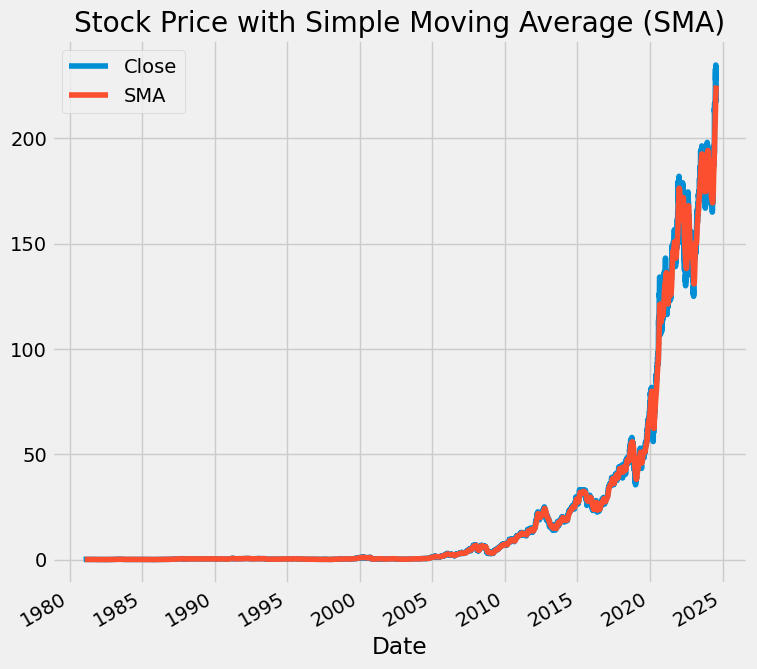

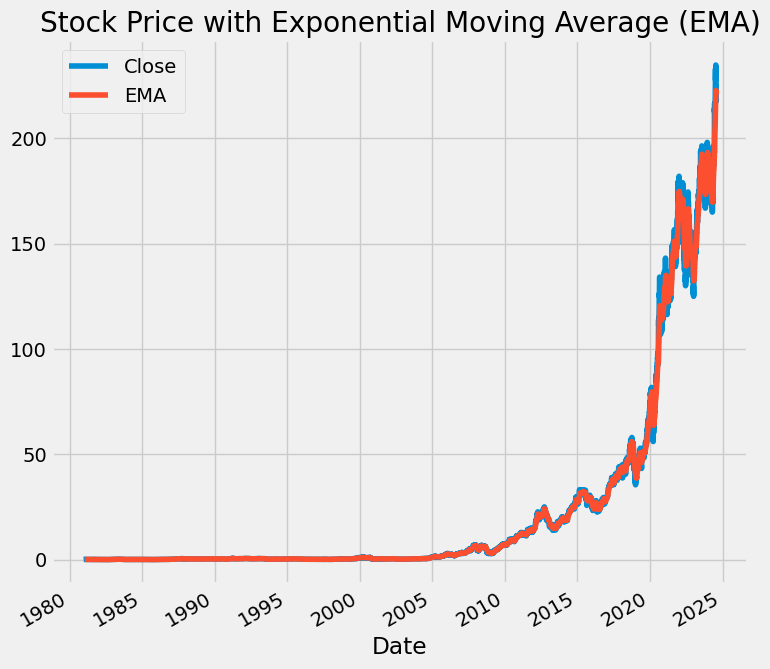

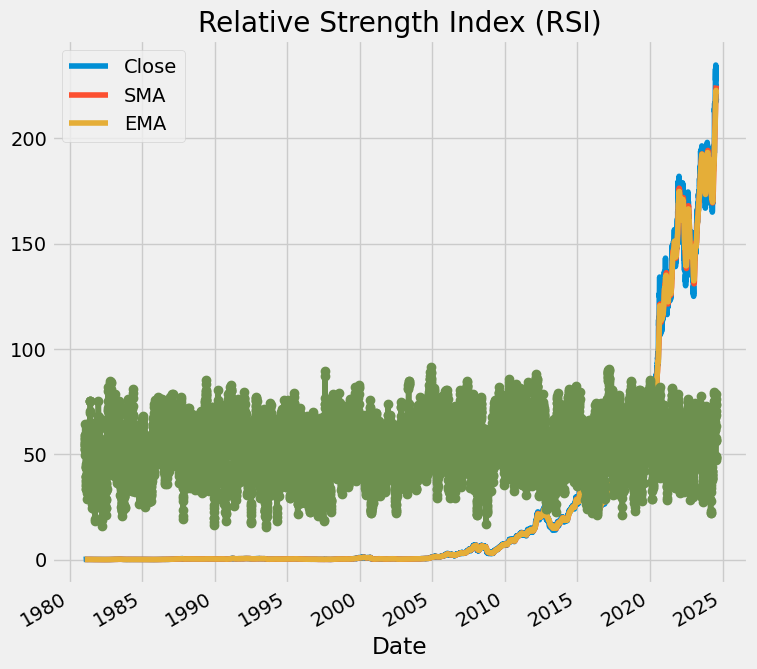

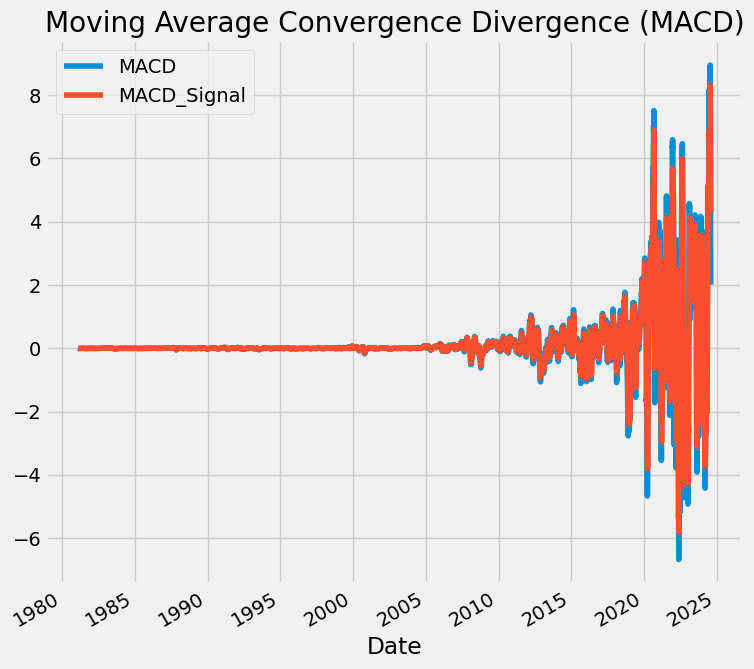

In [25]:
apple_analysis.analyze_stock(apple)

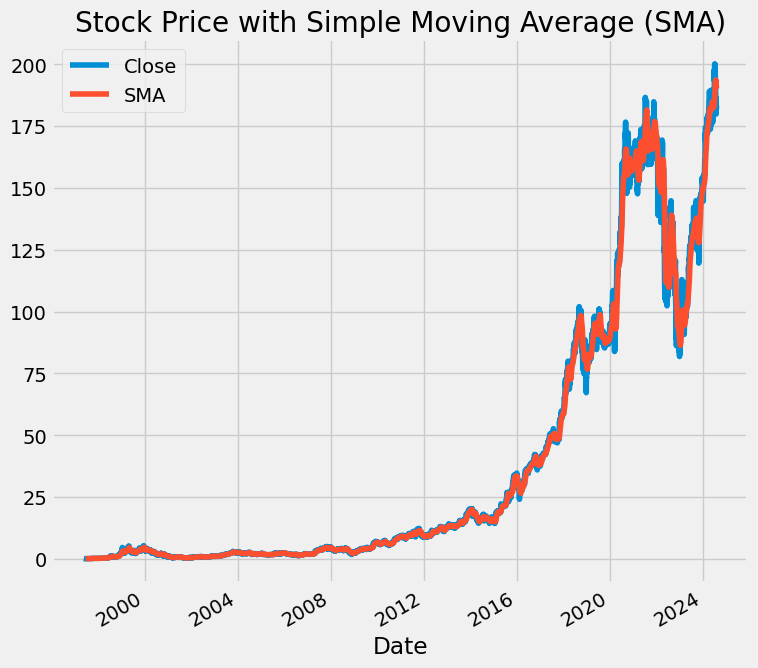

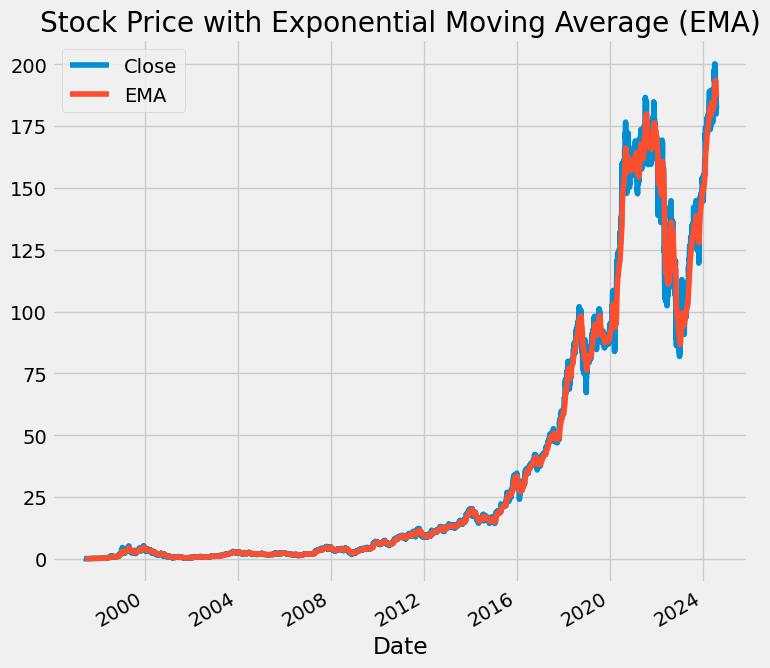

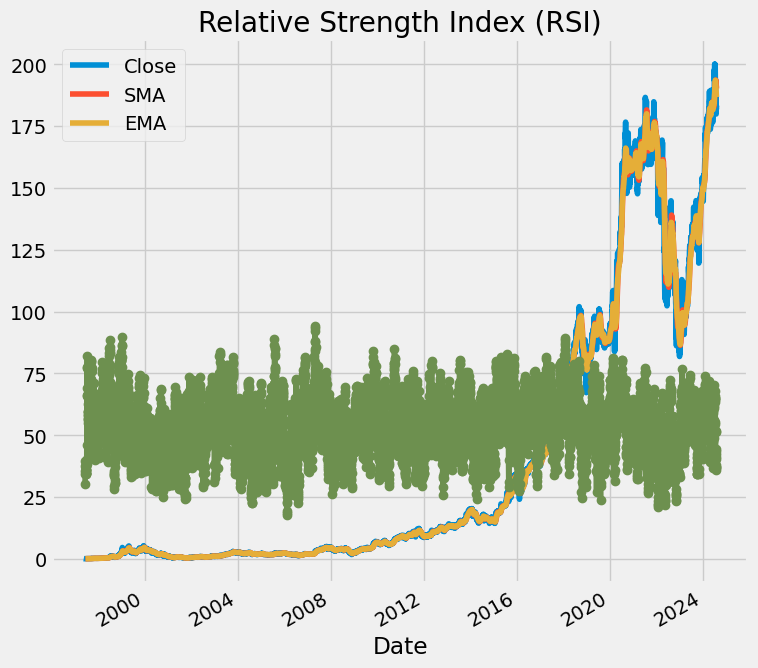

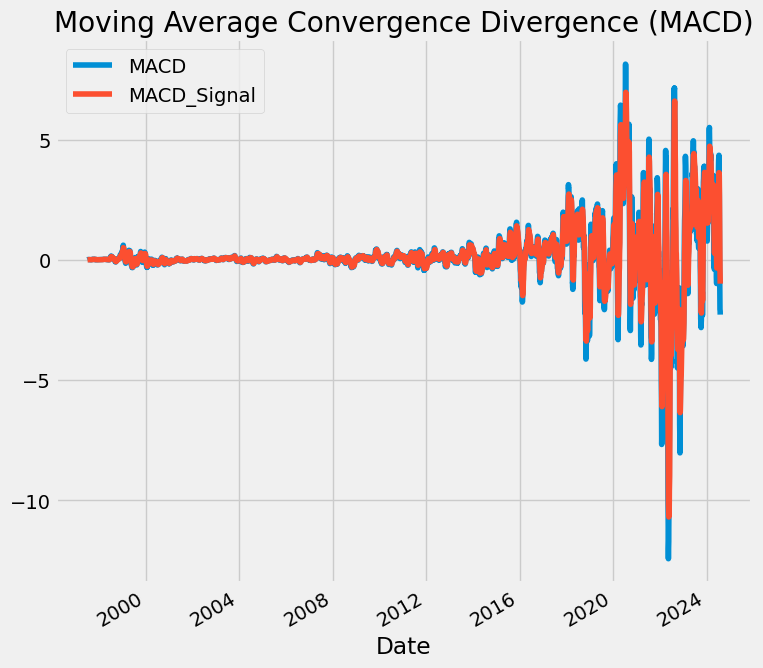

In [26]:
amazon_analysis = FinancialAnalyzer()
amazon_analysis.load_data(amazon)
amazon_analysis.analyze_stock(amazon)

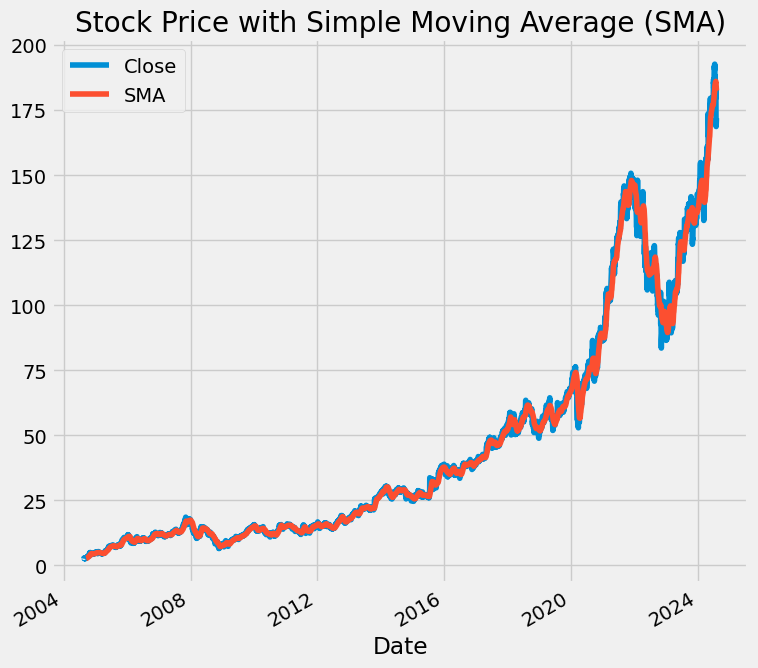

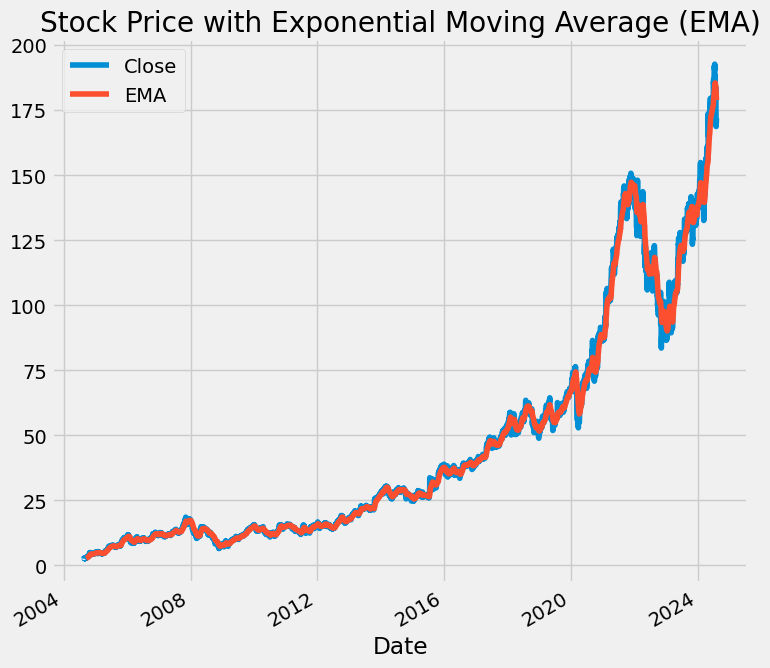

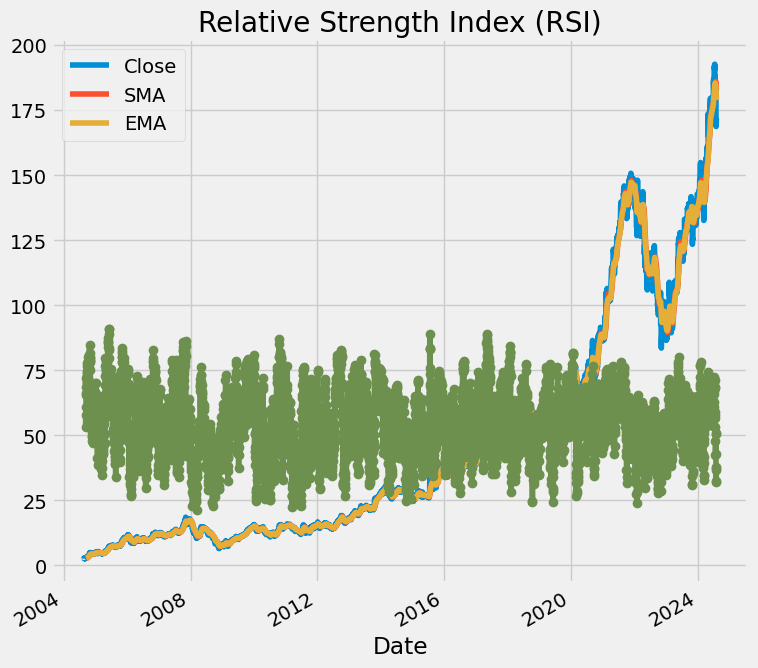

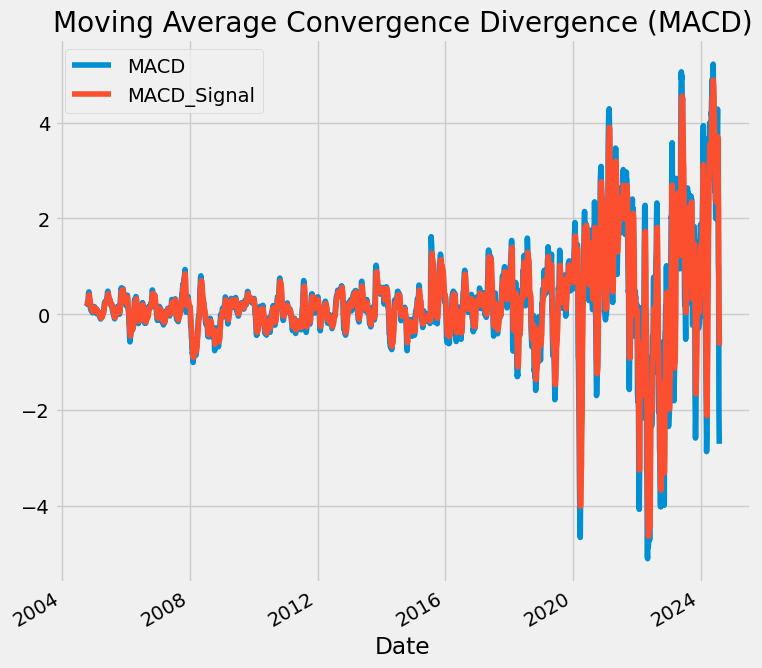

In [27]:
google_analysis = FinancialAnalyzer()
google_analysis.load_data(google)
google_analysis.analyze_stock(google)

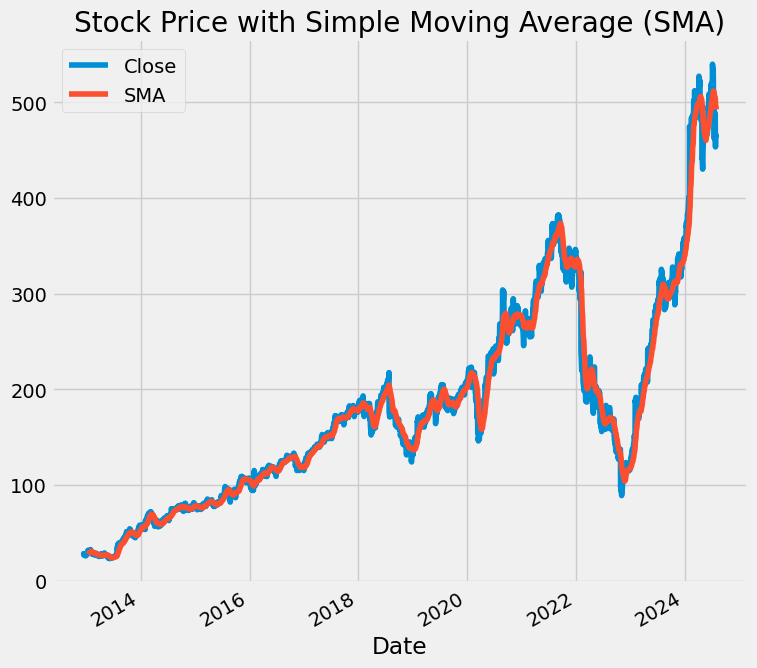

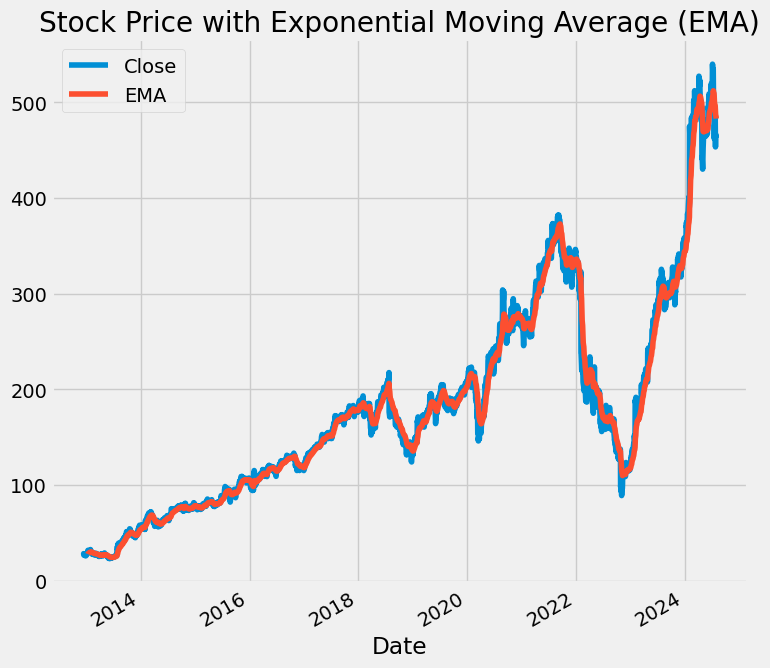

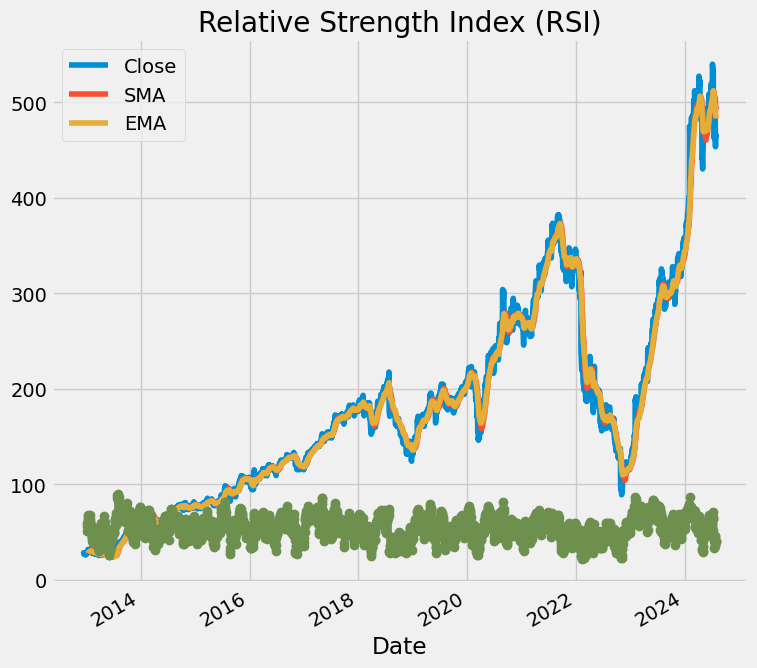

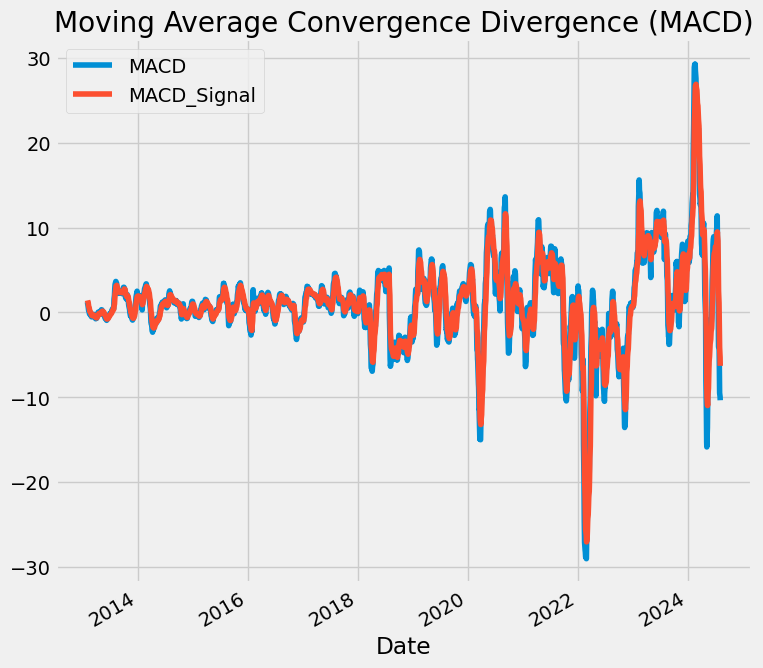

In [28]:
meta_analysis = FinancialAnalyzer()
meta_analysis.load_data(meta)
meta_analysis.analyze_stock(meta)

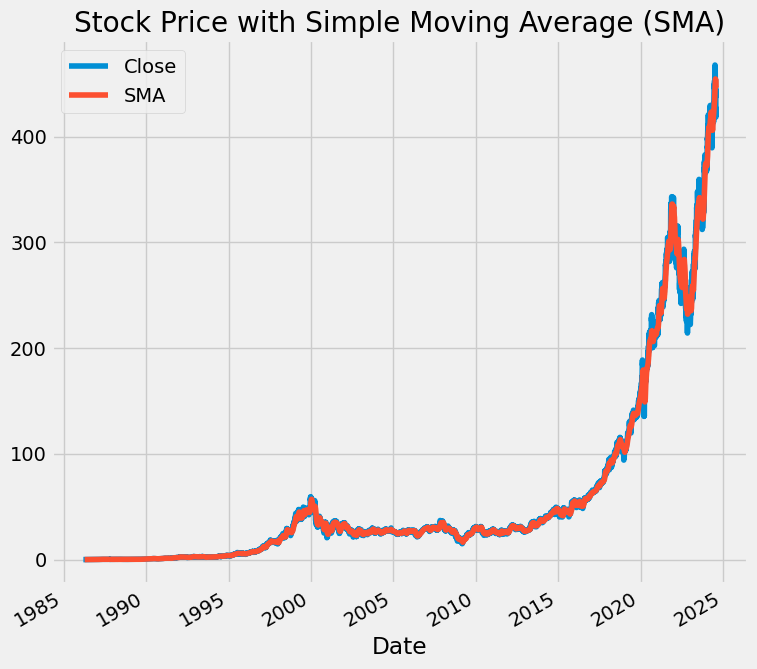

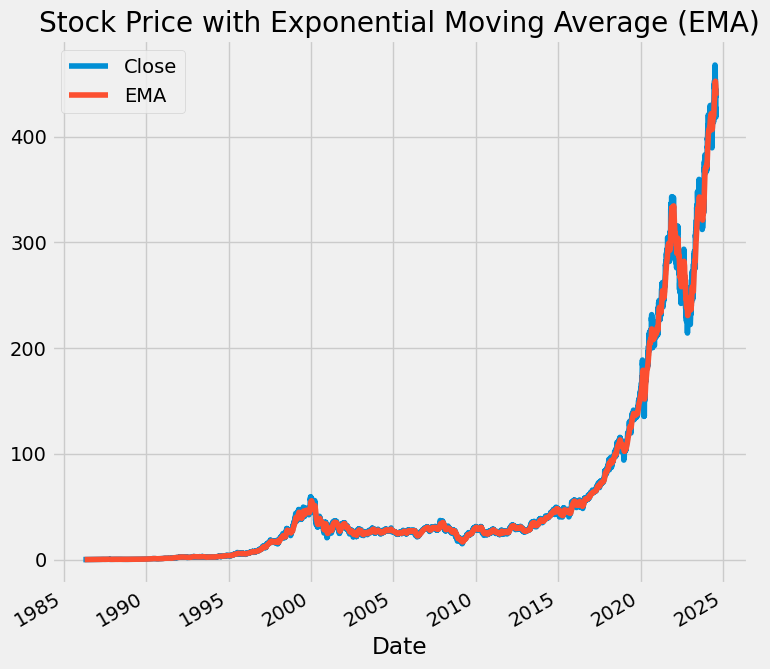

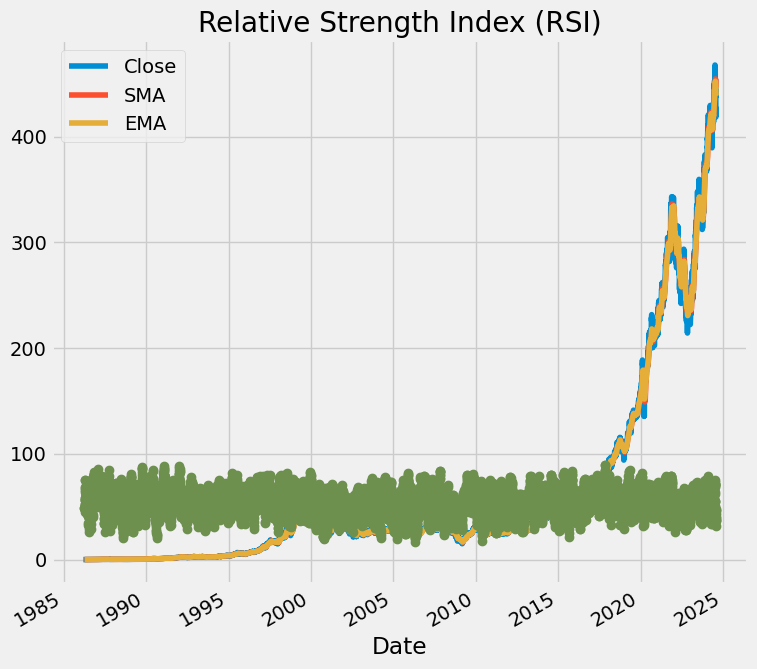

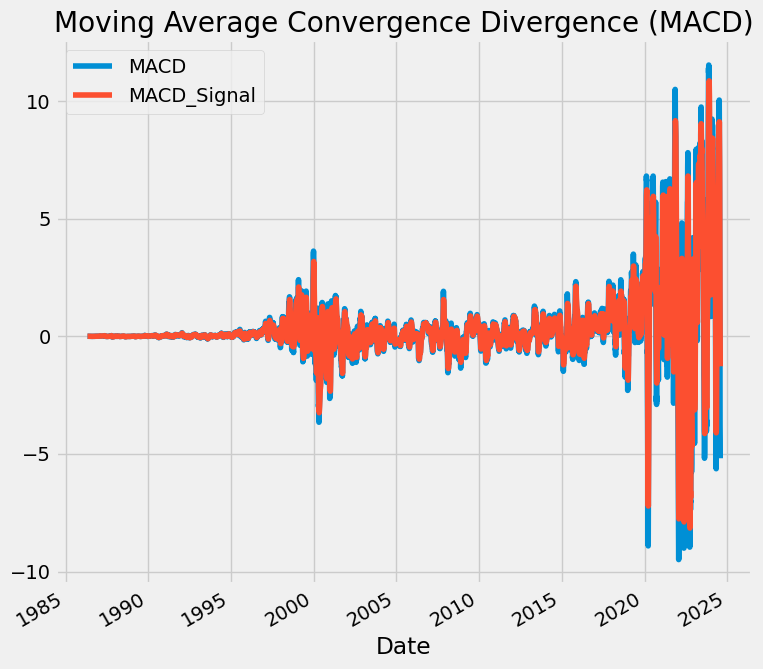

In [29]:
microsoft_analysis = FinancialAnalyzer()
microsoft_analysis.load_data(microsoft)
microsoft_analysis.analyze_stock(microsoft)

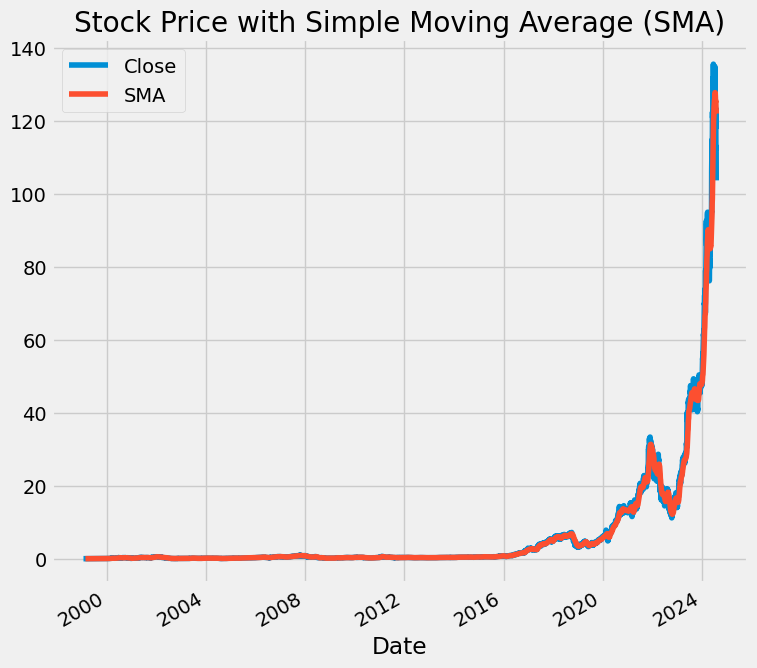

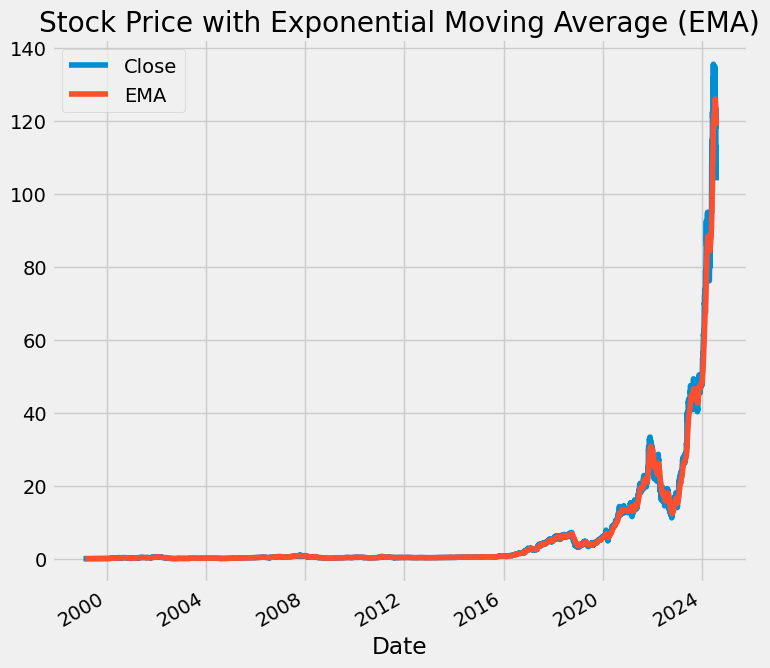

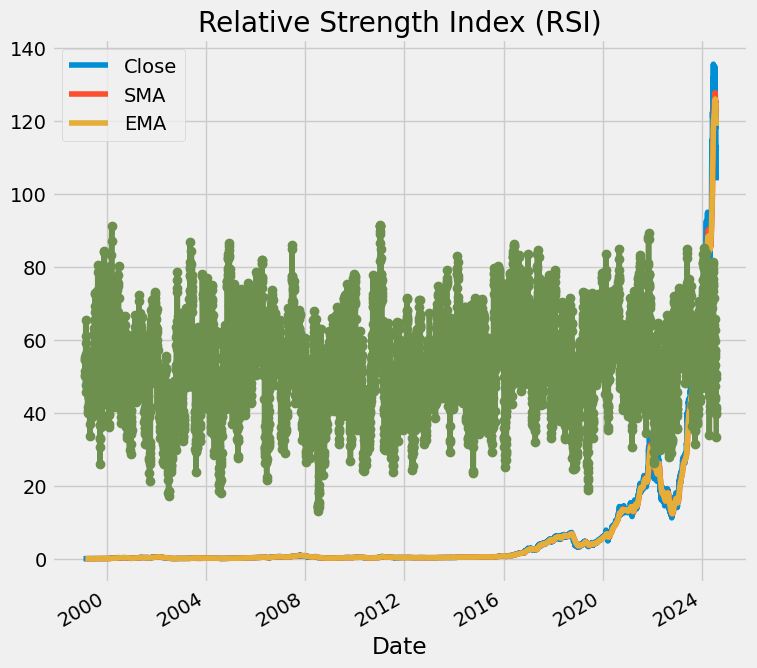

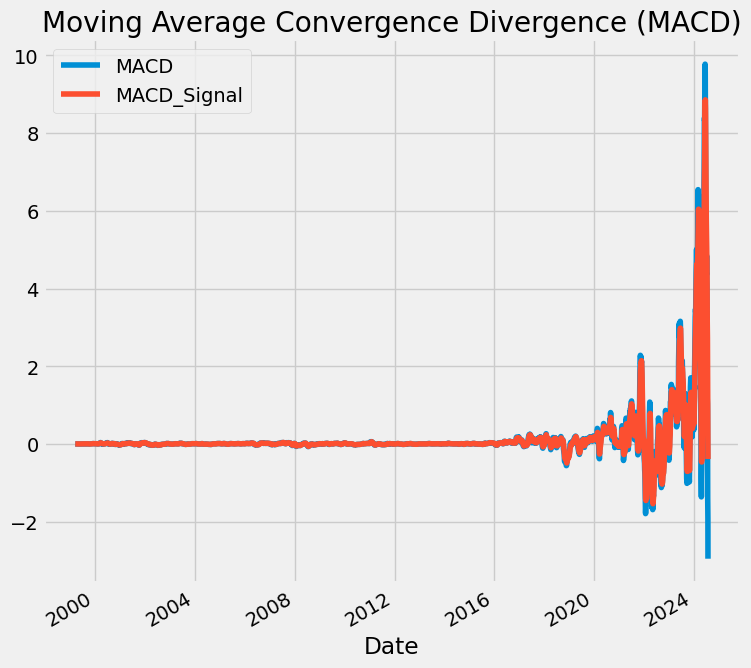

In [30]:
nvda_analysis = FinancialAnalyzer()
nvda_analysis.load_data(nvda)
nvda_analysis.analyze_stock(nvda)

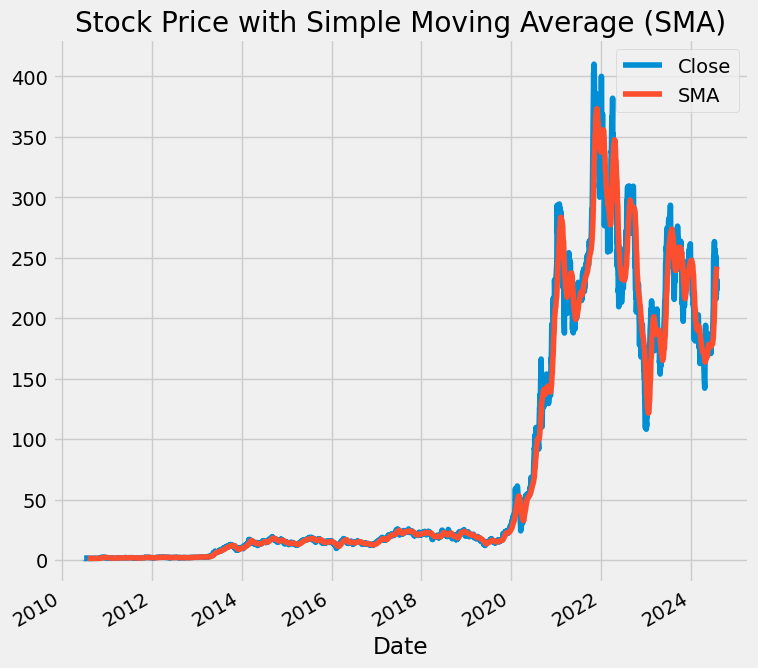

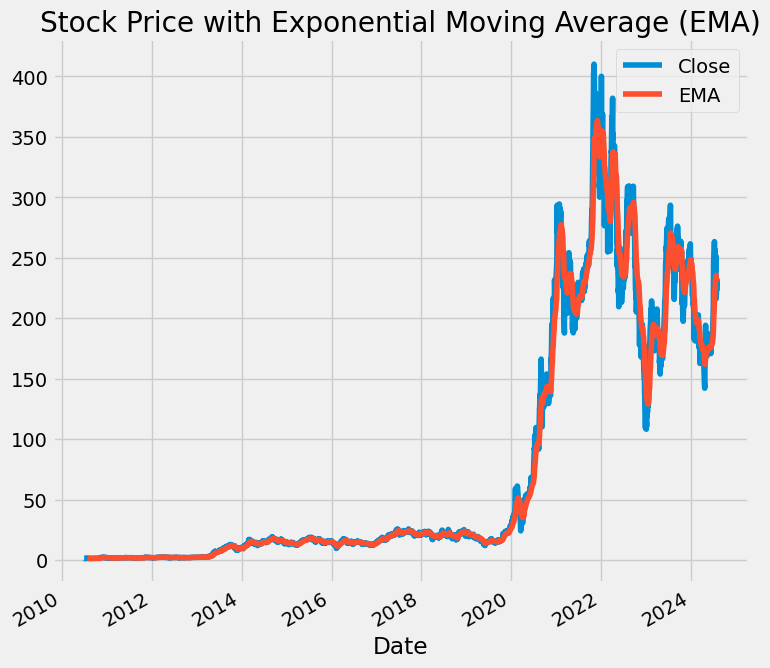

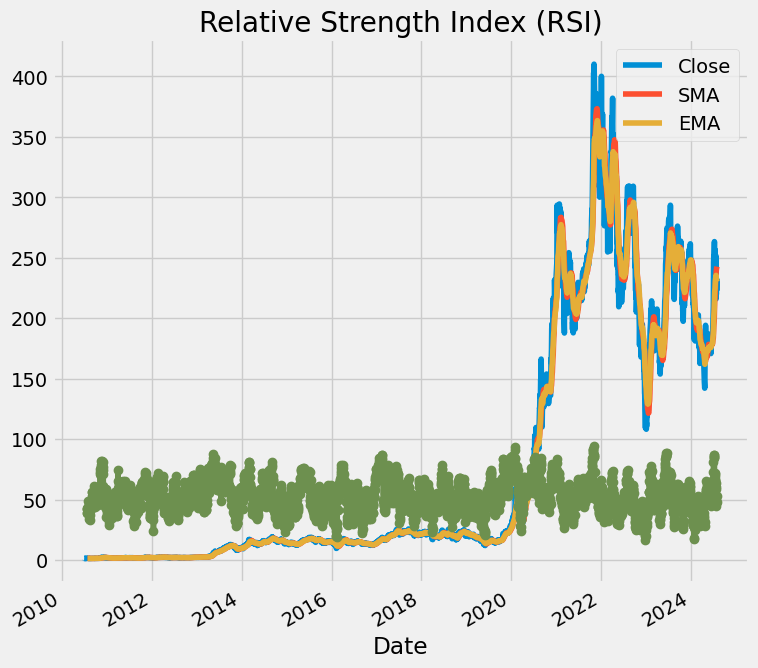

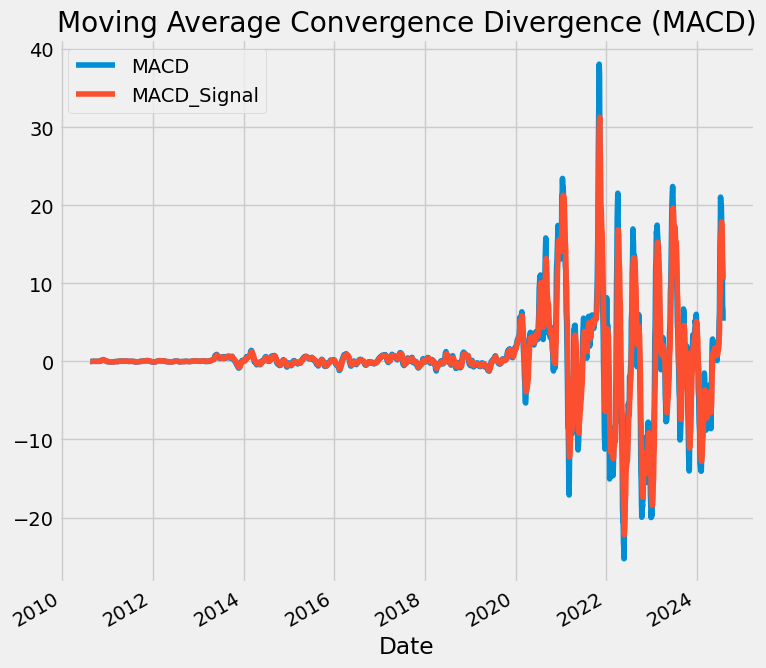

In [31]:
tsla_analysis = FinancialAnalyzer()
tsla_analysis.load_data(tsla)
tsla_analysis.analyze_stock(tsla)

In [42]:
#  pip install PyPortfolioOpt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import seaborn as sns


class Analyze_portfolio:
    def geting_the_combine_data(self,tickers,file_path):
        all_data = {}

        # Step 1: Load data and find the most recent start date
        start_dates = []

        for ticker, path in zip(tickers, file_path):
            data = pd.read_csv(path, index_col='Date', parse_dates=True)['Close']
            all_data[ticker] = data
            start_dates.append(data.index.min())

        # Step 2: Determine the most recent common start date
        most_recent_start_date = max(start_dates)

        # Step 3: Trim the data to the most recent common start date
        for ticker in all_data:
            all_data[ticker] = all_data[ticker][most_recent_start_date:]

        # Step 4: Combine the trimmed data into a single DataFrame
        data = pd.DataFrame(all_data)
        return data
    def calculate_portfolio_weights(self, tickers,file_path): #This output suggests that, for the best risk-adjusted returns, 
        all_data = {}

        # Step 1: Load data and find the most recent start date
        start_dates = []

        for ticker, path in zip(tickers, file_path):
            data = pd.read_csv(path, index_col='Date', parse_dates=True)['Close']
            all_data[ticker] = data
            start_dates.append(data.index.min())

        # Step 2: Determine the most recent common start date
        most_recent_start_date = max(start_dates)

        # Step 3: Trim the data to the most recent common start date
        for ticker in all_data:
            all_data[ticker] = all_data[ticker][most_recent_start_date:]

        # Step 4: Combine the trimmed data into a single DataFrame
        data = pd.DataFrame(all_data)

        print(data.head())  # View the resulting DataFrame
        print(data.tail())
        mu = expected_returns.mean_historical_return(data)
        print(f'expected return {mu}')
        cov = risk_models.sample_cov(data)
        ef = EfficientFrontier(mu, cov)
        weights = ef.max_sharpe()
        weights = dict(zip(tickers, weights.values()))
        return weights

    def calculate_portfolio_performance(self, tickers,file_path): 
        ''' 
        Portfolio Return: Your portfolio might give you a percent return over the next year.
        Portfolio Volatility: There's an perccent risk (standard deviation) associated with these returns.
        Sharpe Ratio: The returns are number times the risk, which is generally considered a good risk-return trade-off.
        '''
        all_data = {}

        # Step 1: Load data and find the most recent start date
        start_dates = []

        for ticker, path in zip(tickers, file_path):
            data = pd.read_csv(path, index_col='Date', parse_dates=True)['Close']
            all_data[ticker] = data
            start_dates.append(data.index.min())

        # Step 2: Determine the most recent common start date
        most_recent_start_date = max(start_dates)

        # Step 3: Trim the data to the most recent common start date
        for ticker in all_data:
            all_data[ticker] = all_data[ticker][most_recent_start_date:]

        # Step 4: Combine the trimmed data into a single DataFrame
        data = pd.DataFrame(all_data)
        mu = expected_returns.mean_historical_return(data)
        cov = risk_models.sample_cov(data)
        ef = EfficientFrontier(mu, cov)
        weights = ef.max_sharpe()
        portfolio_return, portfolio_volatility, sharpe_ratio = ef.portfolio_performance()
        return portfolio_return, portfolio_volatility, sharpe_ratio
    def plot_portfolio_weights(self, weights):
        # Convert the dictionary of weights to lists
        tickers = list(weights.keys())
        allocations = list(weights.values())

        # Plotting the weights as a bar chart
        plt.figure(figsize=(10, 6))
        sns.barplot(x=tickers, y=allocations, palette='viridis')

        # Adding titles and labels
        plt.title('Portfolio Weights')
        plt.xlabel('Tickers')
        plt.ylabel('Allocation (%)')

        # Display the plot
        plt.show()
        
    def plot_portfolio_performance(self , tickers,csv_paths):
        # Portfolio performance data
        portfolio_return, portfolio_volatility, sharpe_ratio = self.calculate_portfolio_performance(tickers, csv_paths)
    
        # Prepare the data for plotting
        metrics = {
            'Expected Return': portfolio_return,
            'Volatility': portfolio_volatility,
            'Sharpe Ratio': sharpe_ratio
        }

        # Plotting the performance metrics
        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Blues_d')

        # Adding titles and labels
        plt.title('Portfolio Performance Metrics')
        plt.ylabel('Values')
        plt.ylim(0, 1.2)  # Adjust the y-axis limit for better visualization

        # Display the plot
        plt.show()
    


   

        # Step 3: Trim the data to the most recent common start date
      

In [43]:
analyze_portfolio = Analyze_portfolio()
tickers = ['AAPL', 'AMZN', 'GOOGL','META','MSFT','NVDA','TSLA']
csv_paths =[apple,amazon,google,meta,microsoft,nvda,tsla]
analyze_portfolio.calculate_portfolio_weights(tickers,csv_paths)

                 AAPL     AMZN      GOOGL       META       MSFT     NVDA  \
Date                                                                       
2012-12-12  19.250000  12.5880  17.373878  27.580000  27.240000  0.31300   
2012-12-13  18.917500  12.5625  17.501900  28.240000  27.110001  0.31325   
2012-12-14  18.206785  12.4595  17.483467  26.809999  26.809999  0.31475   
2012-12-17  18.529642  12.6930  17.952211  26.750000  27.100000  0.31350   
2012-12-18  19.067858  13.0200  17.959435  27.709999  27.559999  0.31400   

                TSLA  
Date                  
2012-12-12  2.350667  
2012-12-13  2.240667  
2012-12-14  2.254000  
2012-12-17  2.293333  
2012-12-18  2.306000  
                  AAPL        AMZN       GOOGL        META        MSFT  \
Date                                                                     
2024-07-24  218.539993  180.830002  174.369995  461.269989  428.899994   
2024-07-25  217.490005  179.850006  169.160004  453.410004  418.399994   
2024-07-26

{'AAPL': 0.0,
 'AMZN': 0.0,
 'GOOGL': 0.0,
 'META': 0.0,
 'MSFT': 0.1156902166947648,
 'NVDA': 0.7321878809499263,
 'TSLA': 0.1521219023553091}

In [45]:
the_whole_data=analyze_portfolio.geting_the_combine_data(tickers,csv_paths)
the_whole_data.head()

AAPL     AMZN      GOOGL       META       MSFT     NVDA  \
Date                                                                       
2012-12-12  19.250000  12.5880  17.373878  27.580000  27.240000  0.31300   
2012-12-13  18.917500  12.5625  17.501900  28.240000  27.110001  0.31325   
2012-12-14  18.206785  12.4595  17.483467  26.809999  26.809999  0.31475   
2012-12-17  18.529642  12.6930  17.952211  26.750000  27.100000  0.31350   
2012-12-18  19.067858  13.0200  17.959435  27.709999  27.559999  0.31400   

                TSLA  
Date                  
2012-12-12  2.350667  
2012-12-13  2.240667  
2012-12-14  2.254000  
2012-12-17  2.293333  
2012-12-18  2.306000

In [47]:
the_whole_data.to_csv('../data/closing_for_the_seven_data_together.csv')

In [34]:
def calculate_portfolio_performance_after_taking_the_common_time(self, tickers,file_path): 
        ''' 
        Portfolio Return: Your portfolio might give you a percent return over the next year.
        Portfolio Volatility: There's an perccent risk (standard deviation) associated with these returns.
        Sharpe Ratio: The returns are number times the risk, which is generally considered a good risk-return trade-off.
        '''
        all_data = {}

        # Step 1: Load data and find the most recent start date
        start_dates = []

        for ticker, path in zip(tickers, file_path):
            data = pd.read_csv(path, index_col='Date', parse_dates=True)['Close']
            all_data[ticker] = data
            start_dates.append(data.index.min())

        # Step 2: Determine the most recent common start date
        most_recent_start_date = max(start_dates)

        # Step 3: Trim the data to the most recent common start date
        for ticker in all_data:
            all_data[ticker] = all_data[ticker][most_recent_start_date:]

        # Step 4: Combine the trimmed data into a single DataFrame
        data = pd.DataFrame(all_data)
        mu = expected_returns.mean_historical_return(data)
        cov = risk_models.sample_cov(data)
        ef = EfficientFrontier(mu, cov)
        weights = ef.max_sharpe()
        portfolio_return, portfolio_volatility, sharpe_ratio = ef.portfolio_performance()
        return portfolio_return, portfolio_volatility, sharpe_ratio

### This output suggests that, for the best risk-adjusted returns, 
- **AAPL: 0.0** - You should not allocate any of your investment into Apple (AAPL).
- **AMZN: 0.00** - Allocate approximately 8.44% of your total investment into Amazon (AMZN).
- **GOOGL: 0.00** - Allocate about 25.92% of your total investment into Alphabet (GOOGL).
- **META: 0.00** - Allocate approximately 15.52% of your total investment into Meta (META).
- **MSFT: 0.1156902166947648** - Allocate about 20.51% of your total investment into Microsoft (MSFT).
- **NVDA: 0.7321878809499263** - Allocate approximately 6.84% of your total investment into Nvidia (NVDA).
- **TSLA: 0.1521219023553091** - Allocate about 22.77% of your total investment into Tesla (TSLA).


In [35]:
analyze_portfolio.calculate_portfolio_performance(tickers,csv_paths)

(0.5788203573268834, 0.39026904603504264, 1.4318849086399394)

- **Portfolio Return: 0.3015** - This suggests that the portfolio is expected to return approximately 30.15% over the period analyzed.
- **Portfolio Volatility: 0.2897** - This indicates that the portfolio has a volatility (risk) of about 28.97%, which measures the degree of variation in the portfolio's returns.
- **Sharpe Ratio: 0.9716** - This Sharpe Ratio implies that the portfolio has a risk-adjusted return of approximately 0.97. A higher Sharpe Ratio is generally better, as it indicates a more favorable risk-return tradeoff.


C:\Users\bekib\AppData\Local\Temp\ipykernel_17588\387272979.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tickers, y=allocations, palette='viridis')


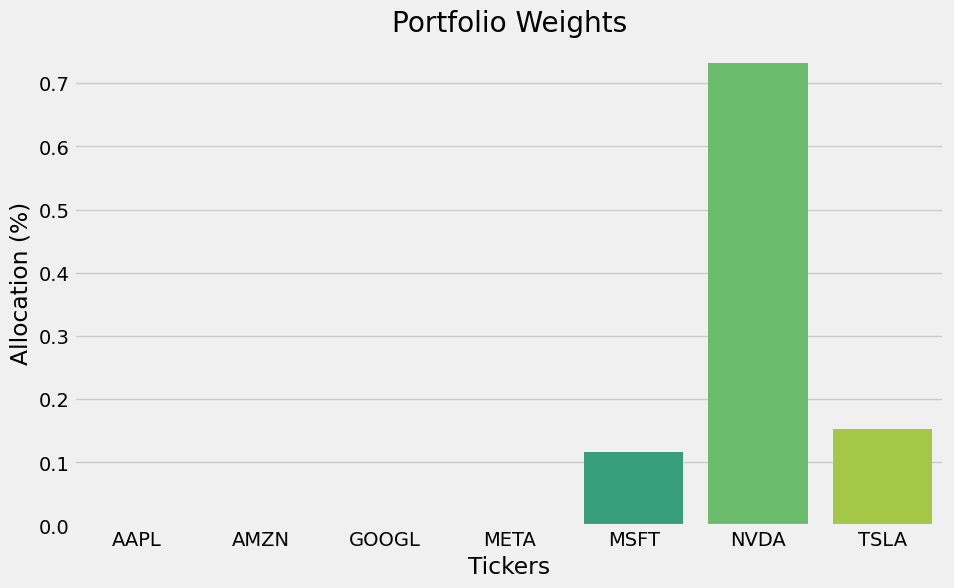

In [36]:
weights = {'AAPL': 0.0,
 'AMZN': 0.0,
 'GOOGL': 0.0,
 'META': 0.0,
 'MSFT': 0.1156902166947648,
 'NVDA': 0.7321878809499263,
 'TSLA': 0.1521219023553091
 }
analyze_portfolio.plot_portfolio_weights(weights)

C:\Users\bekib\AppData\Local\Temp\ipykernel_17588\387272979.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='Blues_d')


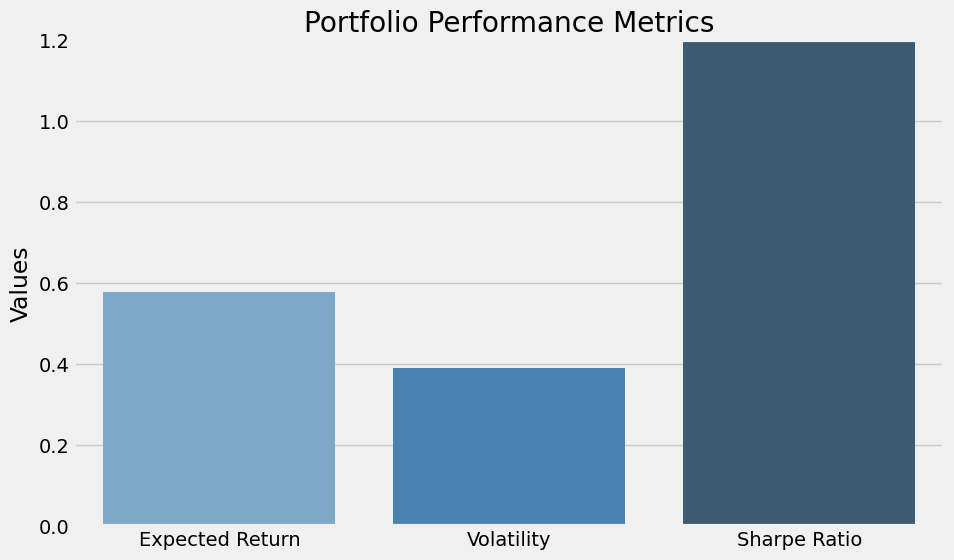

In [37]:
analyze_portfolio.plot_portfolio_performance(tickers,csv_paths)